<a href="https://colab.research.google.com/github/Pakeeru/Lung-Xray-Classification/blob/main/LungXray_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Fastai on covid-19 dataset</h2>


### Step 1: Installing latest version of torch


In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0" #restart runtime after its done executing only if asked for.

     |████████████████████████████████| 753.4 MB 7.0 kB/s 
     |████████████████████████████████| 4.0 MB 26.9 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.4.0 which is incompatible.


## In case the system asks you to Restart Runtime, just execute.

### Step 2: Set up google colab for fast.ai

In [ ]:
! pip install fastai==1.0.61

### Step 3: Import required libraries for image classification problem


In [ ]:
from fastai.vision import *

### Step 4: Mounting Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Step 5: Setting path

In [ ]:
%cd /content/gdrive/My\ Drive
path=Path('project/poojitha/Covid-19/train') #set your path based on where you store.

/content/gdrive/My Drive


In [ ]:
!ls {path} #printing list of files/folder in the path

Covid  export.pkl  models  Normal  PNEUMONIA  Seasonal_flu  tuberculosis


### Step 6: Image Preprocessing


Verifying for corrupt Images in the dataset

In [ ]:
classes = ['Covid','Normal','Seasonal_flu','PNEUMONIA','tuberculosis'] ##Classification problem

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500 )

Covid


Normal


Seasonal_flu


PNEUMONIA


tuberculosis


Dataset needs to be converted into a DataBunch object, and in the case of the computer vision data - specifically into an ImageDataBunch subclass. Parameter 1 is the path of the folder, train='.', . means the files that are present the forder are all train data with validation data of 20 percent.

Here is the link for get_transform
https://docs.fast.ai/vision.transform.html#get_transforms

In [ ]:
np.random.seed(3)
data = ImageDataBunch.from_folder(path,train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

##It is always a good practice to check whether the data is read correctly or not.

In [ ]:
data.classes

['Covid', 'Normal', 'PNEUMONIA', 'Seasonal_flu', 'tuberculosis']

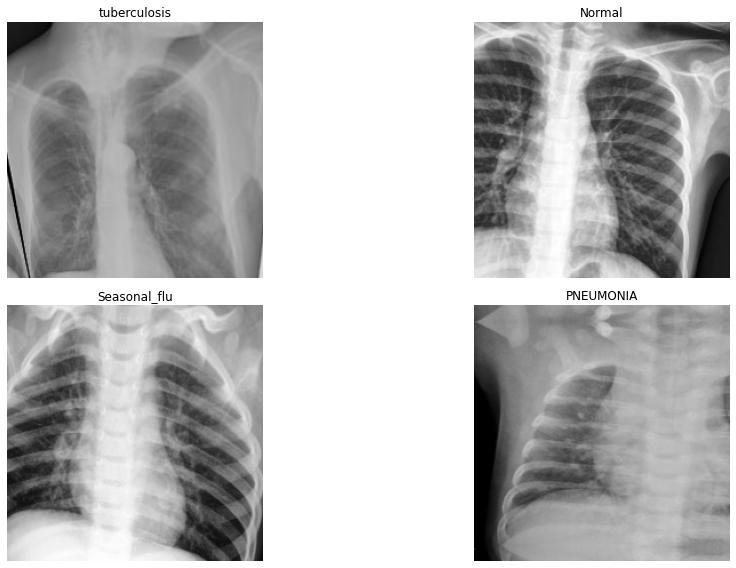

In [ ]:
data.show_batch(rows=2, figsize=(16,8))

### Step 7. Train model.  

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate) #CNN:  Convolution neural net

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

##Go to PPT

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.048944,1.886233,0.700935,00:09
1,1.370456,0.985253,0.261682,00:07
2,0.981568,0.503616,0.168224,00:07
3,0.767896,0.320718,0.112150,00:07
4,0.643329,0.234372,0.084112,00:07
5,0.552087,0.215775,0.074766,00:07
6,0.486753,0.230923,0.074766,00:07
7,0.424772,0.249826,0.074766,00:07
8,0.381884,0.242239,0.074766,00:07
9,0.346158,0.224657,0.074766,00:07


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze() #Train weights at all the layers of the network

In [ ]:
learn.lr_find() #We can either manually supply start and end learning rate or it will take values between 1e-07 to 1e01 by default

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


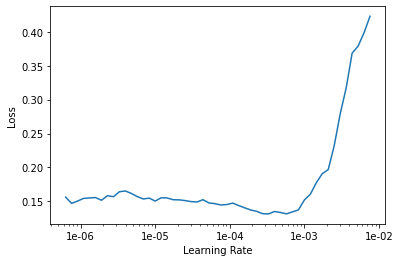

In [ ]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-4)) #The idea of decreasing the learning rate as you train is called learning rate annealing

epoch,train_loss,valid_loss,error_rate,time
0,0.244641,0.200721,0.074766,00:08
1,0.203546,0.179507,0.056075,00:08
2,0.191897,0.173890,0.056075,00:08
3,0.167825,0.194240,0.056075,00:08
4,0.144624,0.213257,0.056075,00:08
5,0.138513,0.149833,0.056075,00:08
6,0.125798,0.130074,0.037383,00:08
7,0.109630,0.126327,0.037383,00:08
8,0.101550,0.131046,0.028037,00:08
9,0.092190,0.129797,0.037383,00:08


In [ ]:
learn.save('stage-2')

### Step 8. Interpret the result

In [ ]:
learn.load('stage-2');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

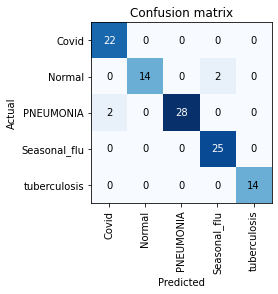

In [ ]:
interp.plot_confusion_matrix() #Confusion matrix is where actual results are in rows and predicted are in columns

In [ ]:
from fastai.widgets import ClassConfusion

In [ ]:
ClassConfusion(interp,classes)

Please enter a value for `k`, or the top images you will see: 2


100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


<Figure size 432x288 with 0 Axes>

### Step 9. Predict a new image for the class it belongs to

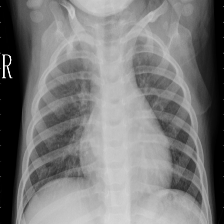

In [ ]:
path=Path('project/poojitha/Covid-19/test')
img = open_image(path/'test4p.jpeg')
img.resize(torch.Size([img.shape[0],224,224]))

In [ ]:
learn.export()
path=Path('project/poojitha/Covid-19/train')

learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'PNEUMONIA'